In [1]:
import pandas as pd
import numpy as np
import json
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
app = pd.read_csv('../data/application_train.csv')

In [7]:
app.shape

(307511, 122)

In [3]:
app.isna().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [24]:
app= app.dropna()

Random under-sampling:
0    526
1    526
Name: TARGET, dtype: int64


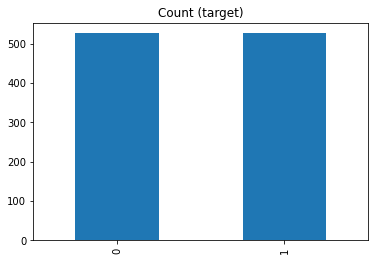

In [25]:
count_class_0, count_class_1 = app.TARGET.value_counts()
df_class_0 = app[app['TARGET'] == 0]
df_class_1 = app[app['TARGET'] == 1]

df_class_0_under = df_class_0.sample(count_class_1)
app = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(app.TARGET.value_counts())

app.TARGET.value_counts().plot(kind='bar', title='Count (target)');

In [6]:
app_nona.shape

(8602, 122)

In [26]:
df = pd.get_dummies(app)

In [27]:
df.corr().abs()['TARGET'].sort_values(ascending=False)

TARGET                                  1.000000
EXT_SOURCE_3                            0.309916
EXT_SOURCE_1                            0.258395
EXT_SOURCE_2                            0.236556
NAME_EDUCATION_TYPE_Higher education    0.143593
                                          ...   
FLAG_DOCUMENT_12                             NaN
FLAG_DOCUMENT_17                             NaN
FLAG_DOCUMENT_20                             NaN
FLAG_DOCUMENT_21                             NaN
FLAG_OWN_CAR_Y                               NaN
Name: TARGET, Length: 227, dtype: float64

In [28]:
X, y = df.iloc[:, 2:], df.iloc[:, 1]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [30]:
reg = LinearRegression().fit(X_train,y_train)

In [31]:
reg.score(X_train,y_train)

0.35672078479792824

In [34]:
sum(reg.predict(X_test)-y_test)/len(y_test)

0.051544986178629015

In [39]:
sum(np.around(reg.predict(X_test))-y_test)/len(y_test)

0.04310344827586207